In [1]:
import os
import csv
import platform
import pandas as pd
import networkx as nx
from graph_partitioning import GraphPartitioning, utils

run_metrics = True

cols = ["WASTE", "CUT RATIO", "EDGES CUT", "TOTAL COMM VOLUME", "Qds", "CONDUCTANCE", "MAXPERM", "RBSE", "NMI", "FSCORE", "FSCORE RELABEL IMPROVEMENT", "LONELINESS"]
#cols = ["WASTE", "CUT RATIO", "EDGES CUT", "TOTAL COMM VOLUME", "Q", "Qds", "CONDUCTANCE", "LONELINESS", "NETWORK PERMANENCE", "NORM. MUTUAL INFO", "EDGE CUT WEIGHT", "FSCORE", "FSCORE RELABEL IMPROVEMENT"]
#cols = ["WASTE", "CUT RATIO", "EDGES CUT", "TOTAL COMM VOLUME", "MODULARITY", "LONELINESS", "NETWORK PERMANENCE", "NORM. MUTUAL INFO", "EDGE CUT WEIGHT", "FSCORE", "FSCORE RELABEL IMPROVEMENT"]

pwd = %pwd

config = {

    "DATA_FILENAME": os.path.join(pwd, "data", "predition_model_tests", "network", "network_$$.txt"),
    "OUTPUT_DIRECTORY": os.path.join(pwd, "output"),

    # Set which algorithm is run for the PREDICTION MODEL.
    # Either: 'FENNEL' or 'SCOTCH'
    "PREDICTION_MODEL_ALGORITHM": "FENNEL",

    # Alternativly, read input file for prediction model.
    # Set to empty to generate prediction model using algorithm value above.
    "PREDICTION_MODEL": "",

    
    "PARTITIONER_ALGORITHM": "FENNEL",

    # File containing simulated arrivals. This is used in simulating nodes
    # arriving at the shelter. Nodes represented by line number; value of
    # 1 represents a node as arrived; value of 0 represents the node as not
    # arrived or needing a shelter.
    "SIMULATED_ARRIVAL_FILE": os.path.join(pwd,
                                           "data",
                                           "predition_model_tests",
                                           "dataset_1_shift_rotate",
                                           "simulated_arrival_list",
                                           "percentage_of_prediction_correct_100",
                                           "arrival_100_$$.txt"
                                          ),

    # File containing the prediction of a node arriving. This is different to the
    # simulated arrivals, the values in this file are known before the disaster.
    "PREDICTION_LIST_FILE": os.path.join(pwd,
                                         "data",
                                         "predition_model_tests",
                                         "dataset_1_shift_rotate",
                                         "prediction_list",
                                         "prediction_$$.txt"
                                        ),

    # File containing the geographic location of each node, in "x,y" format.
    "POPULATION_LOCATION_FILE": os.path.join(pwd,
                                             "data",
                                             "predition_model_tests",
                                             "coordinates",
                                             "coordinates_$$.txt"
                                            ),

    # Number of shelters
    "num_partitions": 4,

    # The number of iterations when making prediction model
    "num_iterations": 10,

    # Percentage of prediction model to use before discarding
    # When set to 0, prediction model is discarded, useful for one-shot
    "prediction_model_cut_off": .0,

    # Alpha value used in one-shot (when restream_batches set to 1)
    "one_shot_alpha": 0.5,
    
    "use_one_shot_alpha": False,
    
    # Number of arrivals to batch before recalculating alpha and restreaming.
    "restream_batches": 50,

    # When the batch size is reached: if set to True, each node is assigned
    # individually as first in first out. If set to False, the entire batch
    # is processed and empty before working on the next batch.
    "sliding_window": False,

    # Create virtual nodes based on prediction model
    "use_virtual_nodes": False,

    # Virtual nodes: edge weight
    "virtual_edge_weight": 1.0,
    
    # Loneliness score parameter. Used when scoring a partition by how many
    # lonely nodes exist.
    "loneliness_score_param": 1.2,

    "compute_metrics_enabled" : True,

    ####
    # GRAPH MODIFICATION FUNCTIONS

    # Also enables the edge calculation function.
    "graph_modification_functions": True,

    # If set, the node weight is set to 100 if the node arrives at the shelter,
    # otherwise the node is removed from the graph.
    "alter_arrived_node_weight_to_100": False,

    # Uses generalized additive models from R to generate prediction of nodes not
    # arrived. This sets the node weight on unarrived nodes the the prediction
    # given by a GAM.
    # Needs POPULATION_LOCATION_FILE to be set.
    "alter_node_weight_to_gam_prediction": False,
    
    # Enables edge expansion when graph_modification_functions is set to true
    "edge_expansion_enabled": True,

    # The value of 'k' used in the GAM will be the number of nodes arrived until
    # it reaches this max value.
    "gam_k_value": 100,

    # Alter the edge weight for nodes that haven't arrived. This is a way to
    # de-emphasise the prediction model for the unknown nodes.
    "prediction_model_emphasis": 1.0,
    
    # This applies the prediction_list_file node weights onto the nodes in the graph
    # when the prediction model is being computed and then removes the weights
    # for the cutoff and batch arrival modes
    "apply_prediction_model_weights": True,

    "SCOTCH_LIB_PATH": os.path.join(pwd, "libs/scotch/macOS/libscotch.dylib")
    if 'Darwin' in platform.system()
    else "/usr/local/lib/libscotch.so",
    
    # Path to the PaToH shared library
    "PATOH_LIB_PATH": os.path.join(pwd, "libs/patoh/lib/macOS/libpatoh.dylib")
    if 'Darwin' in platform.system()
    else os.path.join(pwd, "libs/patoh/lib/linux/libpatoh.so"),
    
    "PATOH_ITERATIONS": 5,
        
    # Expansion modes: 'avg_node_weight', 'total_node_weight', 'smallest_node_weight'
    # 'largest_node_weight'
    # add '_squared' or '_sqrt' at the end of any of the above for ^2 or sqrt(weight)
    # i.e. 'avg_node_weight_squared
    "PATOH_HYPEREDGE_EXPANSION_MODE": 'no_expansion',
    
    # Edge Expansion: average, total, minimum, maximum, product, product_squared, sqrt_product
    "EDGE_EXPANSION_MODE" : 'total',
    
    # Whether nodes should be reordered using a centrality metric for optimal node assignments in batch mode
    # This is specific to FENNEL and at the moment Leverage Centrality is used to compute new noder orders
    "FENNEL_NODE_REORDERING_ENABLED": False,
    
    # Whether the Friend of a Friend scoring system is active during FENNEL partitioning.
    # FOAF employs information about a node's friends to determine the best partition when
    # this node arrives at a shelter and no shelter has friends already arrived
    "FENNEL_FRIEND_OF_A_FRIEND_ENABLED": False,
    
    # Alters how much information to print. Keep it at 1 for this notebook.
    # 0 - will print nothing, useful for batch operations.
    # 1 - prints basic information on assignments and operations.
    # 2 - prints more information as it batches arrivals.
    "verbose": 1
}

gp = GraphPartitioning(config)

# Optional: shuffle the order of nodes arriving
# Arrival order should not be shuffled if using GAM to alter node weights
#random.shuffle(gp.arrival_order)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gp.load_network()

Graph loaded...
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2934
Average degree:   5.8680
Graph is undirected


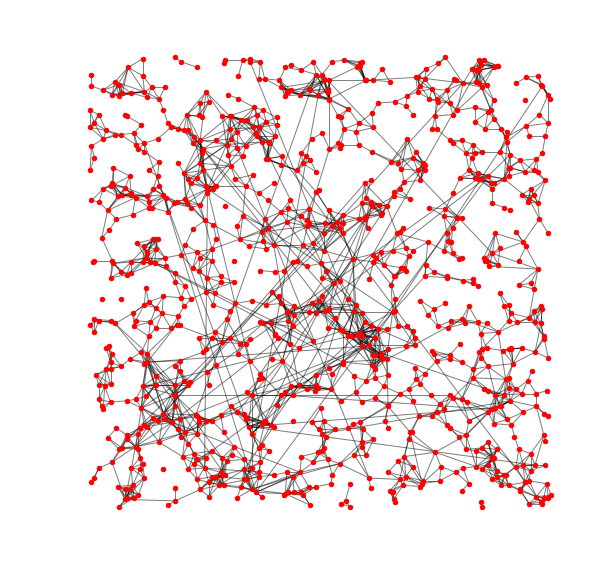

In [3]:
pos = {}
with open(gp.POPULATION_LOCATION_FILE, 'r') as csvfile: 
    reader = csv.reader(csvfile, delimiter=',')
    for node, row in enumerate(reader):
        pos[node] = np.array(row).astype(np.float)

plt.figure(figsize=(10, 10))
plt.axis('off')

nx.draw_networkx_nodes(gp.G, pos, node_size=20, cmap=plt.cm.jet, with_labels=False)
nx.draw_networkx_edges(gp.G, pos, alpha=0.5)
plt.show(gp.G)

In [4]:
gp.init_partitioner()

FENNEL partitioner loaded for generating PREDICTION MODEL.
FENNEL partitioner loaded for making shelter assignments.


# Random Assignment

In [18]:
# assign everyone randomly, one by one
# method 1: 
# 1.1 randomly shuffle all the nodes
# 1.2 assign one by one to each partition, so that the partitions are balanced
import random
import pandas as pd


# run 1000 times
metrics = []
for i in range(0, 250):
    nodes = gp.G.nodes()
    random.shuffle(nodes)

    # compute assignments
    count = 0
    for node in nodes:
        gp.assignments[node] = (count % config["num_partitions"])
        count += 1
    gp.assignments_prediction_score = gp.assignments
    metrics.append(gp._print_score())

    

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning:

In [19]:
df = pd.DataFrame(metrics)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.0,250.0,250.000000
mean,0.0,0.751317,2204.364000,2241.208000,0.569126,0.010720,-0.090428,0.638992,0.0,0.0,0.0,0.508927
std,0.0,0.007792,22.862069,29.247811,0.017741,0.001790,0.023723,0.017098,0.0,0.0,0.0,0.009532
min,0.0,0.728016,2136.000000,2146.000000,0.520630,0.006178,-0.150518,0.598000,0.0,0.0,0.0,0.481857
25%,0.0,0.746080,2189.000000,2223.000000,0.556031,0.009404,-0.108293,0.627000,0.0,0.0,0.0,0.502790
50%,0.0,0.751875,2206.000000,2241.000000,0.571153,0.010668,-0.091650,0.639000,0.0,0.0,0.0,0.508093
75%,0.0,0.756987,2221.000000,2262.000000,0.579724,0.011806,-0.074361,0.650750,0.0,0.0,0.0,0.515646
max,0.0,0.769598,2258.000000,2319.000000,0.617678,0.015462,-0.014229,0.680000,0.0,0.0,0.0,0.536168


In [20]:
for row in metrics:
    s = ''
    for m in row:
        if len(s):
            s += ','
        s += str(m)
    print(s)

0.0,0.749147920927,2198,2247,0.5585628171488917,0.008972652418886617,-0.0949055,0.642,0.0,0.0,0.0,0.505861472992
0.0,0.75221540559,2207,2223,0.5639414562747012,0.011286129704389176,-0.08465074999999998,0.635,0.0,0.0,0.0,0.511726461183
0.0,0.748807089298,2197,2240,0.5924394037012729,0.013974086519520298,-0.07781775,0.632,0.0,0.0,0.0,0.512887859252
0.0,0.741649625085,2176,2191,0.5761374367644646,0.01200535776709913,-0.07185249999999999,0.61,0.0,0.0,0.0,0.5201600438
0.0,0.747443762781,2193,2220,0.5851927698343555,0.009085892113414455,-0.05792374999999999,0.648,0.0,0.0,0.0,0.513325616891
0.0,0.748807089298,2197,2226,0.5838978761629858,0.011570518494409935,-0.09731024999999999,0.64,0.0,0.0,0.0,0.505036250504
0.0,0.748807089298,2197,2209,0.5407163028061508,0.01007673983634812,-0.0748175,0.615,0.0,0.0,0.0,0.519155385701
0.0,0.741649625085,2176,2224,0.5768636457660143,0.012695271763664927,-0.04088575,0.623,0.0,0.0,0.0,0.517861097118
0.0,0.744376278119,2184,2236,0.5337187606006888,0.01156352615

In [27]:
# same experiment for batch arrival, no prediction model
from copy import deepcopy


metrics_batch = []
for i in range(0, 250):
    conf = deepcopy(config)

    conf["DATA_FILENAME"] = conf["DATA_FILENAME"].replace('$$', str(i + 1))
    conf["SIMULATED_ARRIVAL_FILE"] = conf["SIMULATED_ARRIVAL_FILE"].replace('$$', str(i + 1))
    conf["PREDICTION_LIST_FILE"] = conf["PREDICTION_LIST_FILE"].replace('$$', str(i + 1))
    conf["POPULATION_LOCATION_FILE"] = conf["POPULATION_LOCATION_FILE"].replace('$$', str(i + 1))

    with GraphPartitioning(conf) as gp:
        #gp = GraphPartitioning(config)
        gp.verbose = 0
        gp.load_network()
        gp.init_partitioner()
        
        
        nodes = gp.G.nodes()
        random.shuffle(nodes)
        
        count = 0
        for node in nodes:
            if gp.simulated_arrival_list[node] == 1:
                gp.assignments[node] = (count % config["num_partitions"])
                count += 1

        gp.assignments_prediction_score = gp.assignments
        metrics_batch.append(gp._print_score())

        
print('completed')

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning:

completed


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
df_batch = pd.DataFrame(metrics_batch)
df_batch.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,250.000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.0,250.000000
mean,0.001,0.356664,1046.452000,1162.90400,0.625407,0.010399,-0.214152,0.622212,0.000002,0.0,0.0,0.434586
std,0.000,0.003911,11.473721,22.11032,0.032255,0.003538,0.043640,0.031202,0.000000,0.0,0.0,0.018658
min,0.001,0.344240,1010.000000,1086.00000,0.545764,0.001225,-0.327695,0.533762,0.000002,0.0,0.0,0.378800
25%,0.001,0.353783,1038.000000,1149.00000,0.602124,0.007905,-0.244785,0.601286,0.000002,0.0,0.0,0.421870
50%,0.001,0.356851,1047.000000,1164.00000,0.624102,0.010476,-0.218175,0.620579,0.000002,0.0,0.0,0.435010
75%,0.001,0.359577,1055.000000,1179.75000,0.646110,0.012852,-0.188508,0.643087,0.000002,0.0,0.0,0.445013
max,0.001,0.368098,1080.000000,1219.00000,0.716352,0.019643,-0.097446,0.700965,0.000002,0.0,0.0,0.485066


In [29]:
for row in metrics_batch:
    s = ''
    for m in row:
        if len(s):
            s += ','
        s += str(m)
    print(s)

0.001,0.361281526926,1060,1156,0.6043323227215927,0.015854475073913143,-0.2675058906752411,0.6205787781350482,2.22044604925e-06,0.0,0.0,0.42870077732
0.001,0.361622358555,1061,1185,0.6481204529412172,0.008023157621228362,-0.23853854662379423,0.6270096463022508,2.22044604925e-06,0.0,0.0,0.423492677301
0.001,0.359918200409,1056,1182,0.6251273648681569,0.005685588605959326,-0.2272696848874598,0.6109324758842444,2.22044604925e-06,0.0,0.0,0.437122311327
0.001,0.361281526926,1060,1182,0.6356946192085648,0.011561956178353835,-0.22743865594855306,0.662379421221865,2.22044604925e-06,0.0,0.0,0.422270786393
0.001,0.352419904567,1034,1148,0.5942535844449748,0.010511387775724947,-0.18026736012861735,0.6012861736334405,2.22044604925e-06,0.0,0.0,0.440228860821
0.001,0.365030674847,1071,1188,0.6973515467971615,0.0012645572698532792,-0.22357795176848874,0.7009646302250804,2.22044604925e-06,0.0,0.0,0.422078268249
0.001,0.35139740968,1031,1110,0.6096253020076823,0.014407434840487971,-0.13218394855305468,